In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

In [4]:
from keras.utils import np_utils
y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [6]:
model = Sequential()

In [7]:
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 3), activation="relu"))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

In [8]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

In [9]:
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

In [10]:
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(2500, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(1500, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(10, activation="softmax"))

In [11]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)       

In [12]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [13]:
train_history = model.fit(X_train, y_train_onehot, validation_split=0.2, epochs=10, batch_size=128, verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 94s 2ms/step - loss: 1.8337 - accuracy: 0.3113 - val_loss: 1.5899 - val_accuracy: 0.4212
Epoch 2/10
40000/40000 [==============================] - 96s 2ms/step - loss: 1.3956 - accuracy: 0.4900 - val_loss: 1.3071 - val_accuracy: 0.5325
Epoch 3/10
40000/40000 [==============================] - 97s 2ms/step - loss: 1.1961 - accuracy: 0.5684 - val_loss: 1.0677 - val_accuracy: 0.6204
Epoch 4/10
40000/40000 [==============================] - 96s 2ms/step - loss: 1.0496 - accuracy: 0.6245 - val_loss: 0.9777 - val_accuracy: 0.6523
Epoch 5/10
40000/40000 [==============================] - 96s 2ms/step - loss: 0.9483 - accuracy: 0.6628 - val_loss: 0.8933 - val_accuracy: 0.6809
Epoch 6/10
40000/40000 [==============================] - 94s 2ms/step - loss: 0.8657 - accuracy: 0.6936 - val_loss: 0.8008 - val_accuracy: 0.7233
Epoch 7/10
40000/40000 [==============================] - 90s 2ms/st

In [16]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train], label="train")
    plt.plot(train_history.history[validation], label="validation")
    plt.title("Train History")
    plt.xlabel("epoch")
    plt.ylabel(train)
    plt.legend(loc="upper left")
    plt.show()

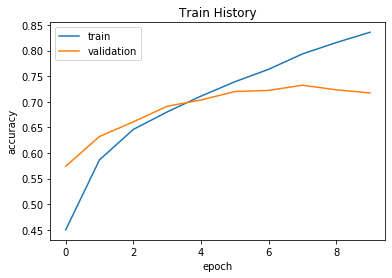

In [17]:
show_train_history(train_history, "accuracy", "val_accuracy")

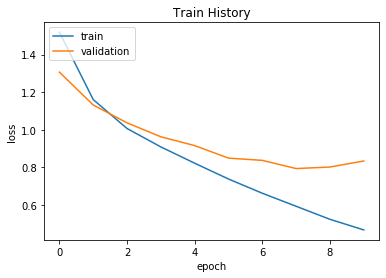

In [19]:
show_train_history(train_history, "loss", "val_loss")

In [20]:
loss, accuracy = model.evaluate(X_test, y_test_onehot)

10000/10000 [==============================] - 1s 144us/step


In [21]:
accuracy

0.7120000123977661

In [15]:
y_predict = model.predict_classes(X_test)

In [16]:
import pandas as pd
pd.crosstab(y_test.reshape(-1), y_predict, rownames=["label"], colnames=["predict"])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,729,8,47,13,8,1,1,5,169,19
1,23,857,2,2,3,2,1,0,50,60
2,68,2,694,41,88,21,44,13,27,2
3,35,1,99,565,73,87,61,24,39,16
4,31,1,81,42,755,10,22,48,9,1
5,16,3,116,199,69,512,24,38,21,2
6,13,5,46,45,68,12,782,3,25,1
7,16,1,52,36,63,25,7,788,7,5
8,32,10,9,3,5,2,1,1,930,7
